 ## EDA do MovieLens (ml-latest-small)

**Objetivo:** explorar rapidamente o dataset (tamanho, distribuição de notas, popularidade de filmes e usuários) e preparar base para recomendações.

> Execute **célula por célula**.

## 01 - Imports e paths

In [20]:
#  — Importando bibliotecas e definindo paths
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho correto para os CSVs
DATA_DIR = Path(r"C:\Users\geise\ml-latest-small\ml-latest-small")

movies_path  = DATA_DIR / "movies.csv"
ratings_path = DATA_DIR / "ratings.csv"
tags_path    = DATA_DIR / "tags.csv"
links_path   = DATA_DIR / "links.csv"

# Verifica se os arquivos existem
for p in [movies_path, ratings_path, tags_path, links_path]:
    print(("OK  " if p.exists() else "NÃO ") + "encontrado:", p)


OK  encontrado: C:\Users\geise\ml-latest-small\ml-latest-small\movies.csv
OK  encontrado: C:\Users\geise\ml-latest-small\ml-latest-small\ratings.csv
OK  encontrado: C:\Users\geise\ml-latest-small\ml-latest-small\tags.csv
OK  encontrado: C:\Users\geise\ml-latest-small\ml-latest-small\links.csv


## 02 - Leitura dos CSVs

In [23]:
#  Carregar CSVs em dataframes
movies  = pd.read_csv(movies_path)
ratings = pd.read_csv(ratings_path)
tags    = pd.read_csv(tags_path)
links   = pd.read_csv(links_path)

# Primeiras linhas
print("Movies:")
display(movies.head(3))
print("Ratings:")
display(ratings.head(3))
print("Tags:")
display(tags.head(3))
print("Links:")
display(links.head(3))




Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


Tags:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


Links:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0


## 03 - Informações gerais dos dados

In [28]:
# Informações gerais
print("=== Movies Info ===")
print(movies.info(), "\n")
print("=== Ratings Info ===")
print(ratings.info(), "\n")
print("=== Tags Info ===")
print(tags.info(), "\n")




=== Movies Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None 

=== Ratings Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None 

=== Tags Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  -

## 04 - Estatísticas descritivas

In [34]:
#  Estatísticas básicas
print("=== Ratings Descriptive Stats ===")
display(ratings.describe())
print("=== Movies head ===")
display(movies.head())


=== Ratings Descriptive Stats ===


,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


=== Movies head ===


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## 05 - Checando valores nulos

In [37]:
# Missing values
print("=== Missing values ===")
for df, name in zip([movies, ratings, tags], ["Movies", "Ratings", "Tags"]):
    print(f"{name} missing values:\n", df.isnull().sum(), "\n")


=== Missing values ===
Movies missing values:
 movieId    0
title      0
genres     0
dtype: int64 

Ratings missing values:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64 

Tags missing values:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64 



## 06 - Quantidade de ratings por usuário

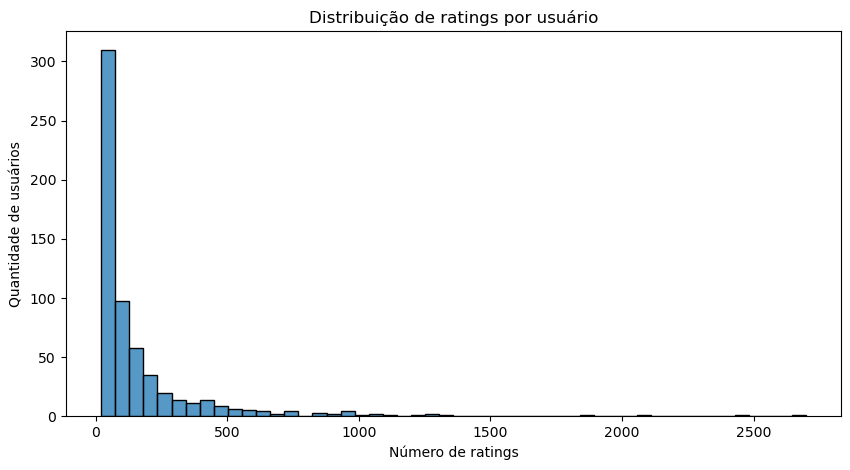

In [43]:
# Ratings por usuário
user_counts = ratings['userId'].value_counts()
plt.figure(figsize=(10,5))
sns.histplot(user_counts, bins=50, kde=False)
plt.title("Distribuição de ratings por usuário")
plt.xlabel("Número de ratings")
plt.ylabel("Quantidade de usuários")
plt.show()



## 07 - A Quantidade de ratings por filme

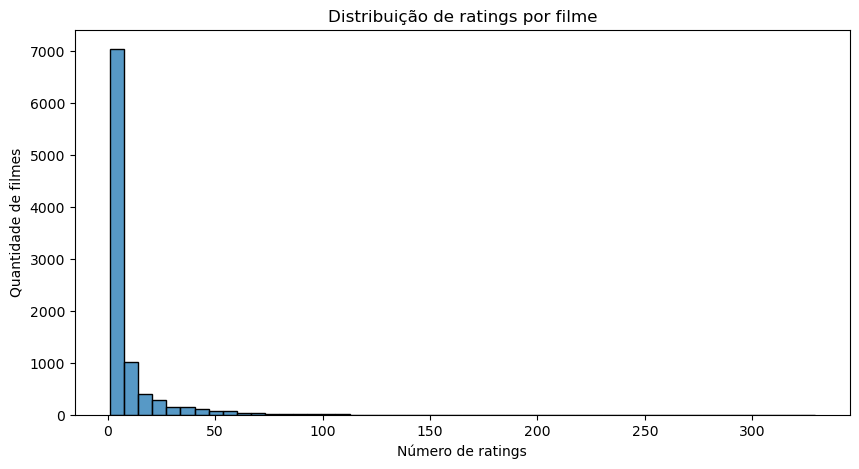

In [49]:
# Ratings por filme
movie_counts = ratings['movieId'].value_counts()
plt.figure(figsize=(10,5))
sns.histplot(movie_counts, bins=50, kde=False)
plt.title("Distribuição de ratings por filme")
plt.xlabel("Número de ratings")
plt.ylabel("Quantidade de filmes")
plt.show()



## 08 - Top 10 filmes mais avaliados

In [52]:
# Top 10 filmes mais avaliados
top10_movies = movie_counts.head(10).index
top10_movies_df = movies[movies['movieId'].isin(top10_movies)]
display(top10_movies_df)


,movieId,title,genres
97,110,Braveheart (1995),Action|Drama|War
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
461,527,Schindler's List (1993),Drama|War
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


## 09 - Preparação para recommender (matrix user-item)

In [56]:
#  Matriz usuário x filme
ratings_matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
print("Matriz usuário x filme:")
display(ratings_matrix.head())


Matriz usuário x filme:


movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,...,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10 - Filtragem colaborativa (User-Based) simples

In [62]:
#  Filtragem colaborativa baseada em usuários
from sklearn.metrics.pairwise import cosine_similarity

# Substitui NaN por 0 para cálculo de similaridade
ratings_matrix_filled = ratings_matrix.fillna(0)

# Calcula similaridade entre usuários
user_similarity = cosine_similarity(ratings_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix.index, columns=ratings_matrix.index)

print("Similaridade entre usuários (exemplo 5 primeiros):")
display(user_similarity_df.iloc[:5, :5])


Similaridade entre usuários (exemplo 5 primeiros):


userId,1,2,3,4,5
userId,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080
2,0.027283,1.000000,0.000000,0.003726,0.016614
3,0.059720,0.000000,1.000000,0.002251,0.005020
4,0.194395,0.003726,0.002251,1.000000,0.128659
5,0.129080,0.016614,0.005020,0.128659,1.000000


## 11 - Função para recomendar filmes para um usuário

In [67]:
# Função de recomendação
def recommend_movies(user_id, ratings_matrix, user_similarity_df, top_n=5):
    # Similaridade do usuário com os demais
    sim_scores = user_similarity_df[user_id]
    
    # Ratings de outros usuários ponderados pela similaridade
    weighted_ratings = ratings_matrix.T.dot(sim_scores) / sim_scores.sum()
    
    # Filmes já avaliados pelo usuário
    user_rated = ratings_matrix.loc[user_id].dropna().index
    
    # Remove filmes já avaliados
    recommendations = weighted_ratings.drop(user_rated, errors='ignore')
    
    # Top N recomendações
    top_recommendations = recommendations.sort_values(ascending=False).head(top_n)
    
    # Retorna títulos
    return movies[movies['movieId'].isin(top_recommendations.index)][['movieId', 'title']].assign(score=top_recommendations.values)

# Teste: recomenda 5 filmes para o usuário 1
recommend_movies(user_id=1, ratings_matrix=ratings_matrix, user_similarity_df=user_similarity_df, top_n=5)


,movieId,title,score
1,2,Jumanji (1995),NaN
3,4,Waiting to Exhale (1995),NaN
4,5,Father of the Bride Part II (1995),NaN
6,7,Sabrina (1995),NaN
7,8,Tom and Huck (1995),NaN


## 12 - Top filmes mais populares (baseline)

In [72]:
# Baseline: filmes mais populares
movie_avg_ratings = ratings.groupby('movieId')['rating'].mean()
top10_popular = movie_avg_ratings.sort_values(ascending=False).head(10)

top10_movies_df = movies[movies['movieId'].isin(top10_popular.index)].merge(
    top10_popular.rename('avg_rating'), on='movieId'
)
top10_movies_df = top10_movies_df.sort_values('avg_rating', ascending=False)
display(top10_movies_df)


,movieId,title,genres,avg_rating
0,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
1,6201,Lady Jane (1986),Drama|Romance,5.0
2,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
3,100556,"Act of Killing, The (2012)",Documentary,5.0
4,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
5,102217,Bill Hicks: Revelations (1993),Comedy,5.0
6,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
7,143511,Human (2015),Documentary,5.0
8,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
9,145994,Formula of Love (1984),Comedy,5.0


## 13 - Visualização dos top filmes populares

C:\Users\geise\AppData\Local\Temp\ipykernel_2040\3151542334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='title', data=top10_movies_df, palette='viridis')


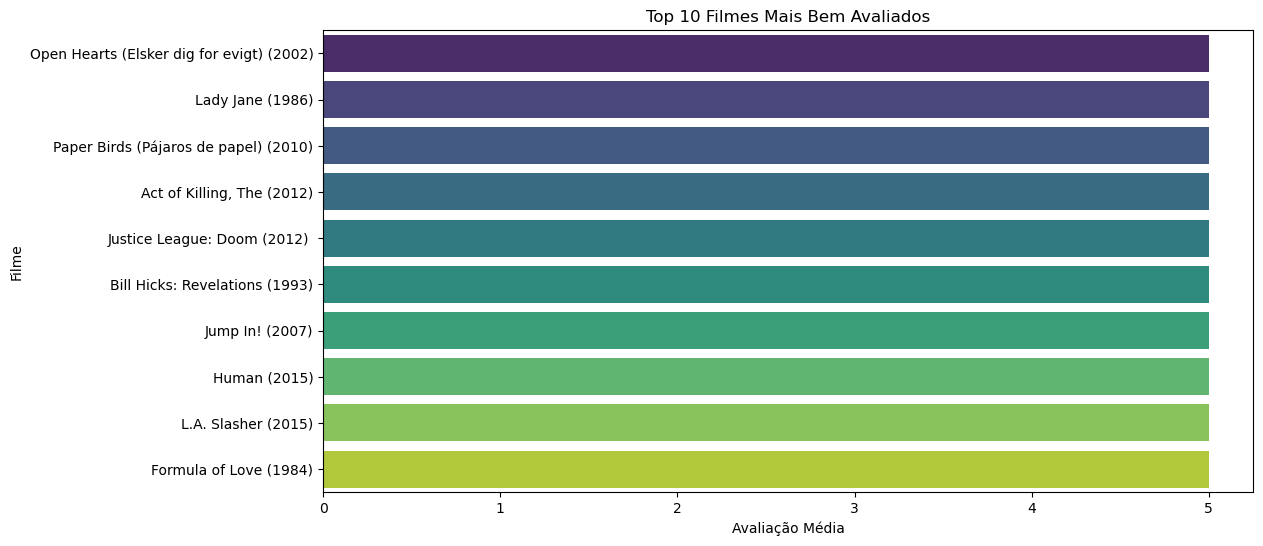

In [81]:
#  Plot dos 10 filmes mais populares
plt.figure(figsize=(12,6))
sns.barplot(x='avg_rating', y='title', data=top10_movies_df, palette='viridis')
plt.title("Top 10 Filmes Mais Bem Avaliados")
plt.xlabel("Avaliação Média")
plt.ylabel("Filme")
plt.show()


## 14 - Avaliação do Recommender (RMSE simples)

In [90]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ratings_matrix_filled: users x movies (NaNs preenchidos)
# user_similarity_df: users x users

pred_matrix = np.zeros(ratings_matrix_filled.shape)

for i, user in enumerate(ratings_matrix_filled.index):
    sim_scores = user_similarity_df.loc[user].values
    user_ratings = ratings_matrix_filled.values
    pred_matrix[i, :] = np.dot(sim_scores, user_ratings) / sim_scores.sum()

# Máscara para considerar apenas os ratings originais
mask = ~ratings_matrix.isna().values

rmse = np.sqrt(mean_squared_error(ratings_matrix.values[mask], pred_matrix[mask]))
print(f"RMSE do sistema de recomendação (User-based CF): {rmse:.4f}")



RMSE do sistema de recomendação (User-based CF): 3.0732


## 15 - Recomendações para usuários

In [95]:
# Número de recomendações por usuário
n_recommend = 5

# DataFrame das previsões
pred_df = pd.DataFrame(pred_matrix, index=ratings_matrix.index, columns=ratings_matrix.columns)

# Função para recomendar filmes para um usuário específico
def recommend_movies(user_id, n=n_recommend):
    # Pega os filmes que o usuário ainda não avaliou
    user_rated = ratings_matrix.loc[user_id].notna()
    preds = pred_df.loc[user_id][~user_rated]
    # Ordena pelas maiores previsões
    top_movies = preds.sort_values(ascending=False).head(n)
    # Junta com títulos
    return movies.set_index('movieId').loc[top_movies.index][['title']].assign(pred_rating=top_movies.values)

# Exemplo: recomendações para o usuário 1
recommend_movies(1)


,title,pred_rating
movieId,,
318,"Shawshank Redemption, The (1994)",2.622414
589,Terminator 2: Judgment Day (1991),2.061920
858,"Godfather, The (1972)",1.836914
2762,"Sixth Sense, The (1999)",1.643315
4993,"Lord of the Rings: The Fellowship of the Ring,...",1.605043


## 16 - Popularidade e gráficos

C:\Users\geise\AppData\Local\Temp\ipykernel_2040\4104530446.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pred_movies.values, y=top_pred_titles.values, palette='viridis')


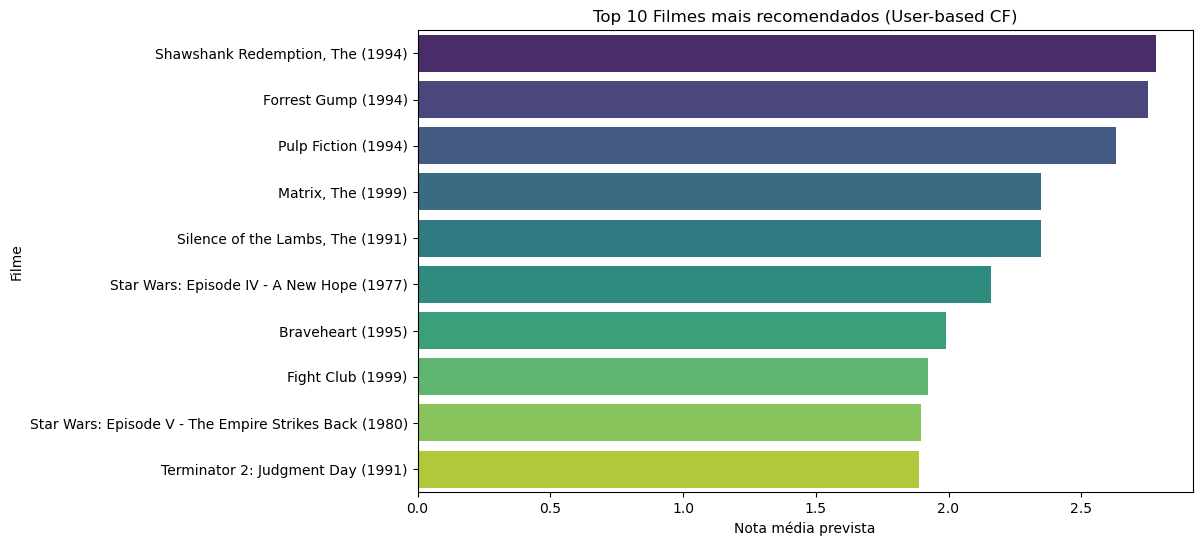

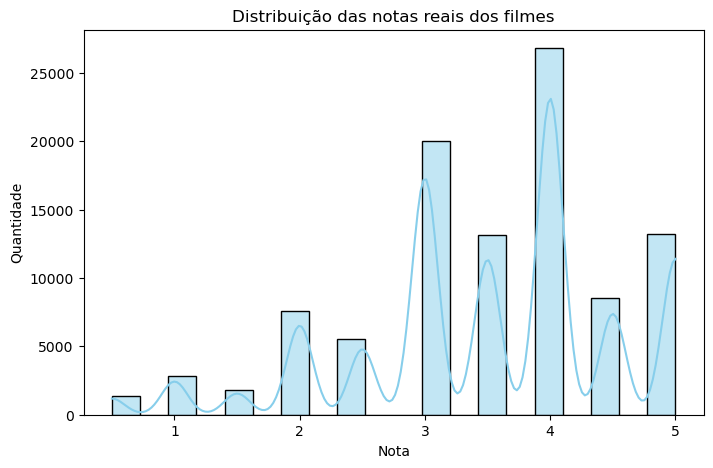

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Filme mais recomendado pelo sistema (top 10 em todas as previsões)
avg_pred_ratings = pred_df.mean(axis=0)
top_pred_movies = avg_pred_ratings.sort_values(ascending=False).head(10)
top_pred_titles = movies.set_index('movieId').loc[top_pred_movies.index]['title']

plt.figure(figsize=(10,6))
sns.barplot(x=top_pred_movies.values, y=top_pred_titles.values, palette='viridis')
plt.title("Top 10 Filmes mais recomendados (User-based CF)")
plt.xlabel("Nota média prevista")
plt.ylabel("Filme")
plt.show()

# 2️⃣ Distribuição das notas reais (para comparar)
plt.figure(figsize=(8,5))
sns.histplot(ratings['rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribuição das notas reais dos filmes")
plt.xlabel("Nota")
plt.ylabel("Quantidade")
plt.show()


## 17 - Recomendações em massa

In [106]:
# Número de recomendações por usuário
n_recommend = 5

# Função para gerar recomendações para todos os usuários
all_recommendations = []

for user_id in ratings_matrix.index:
    user_recs = recommend_movies(user_id, n=n_recommend)
    user_recs = user_recs.reset_index()
    user_recs['userId'] = user_id
    all_recommendations.append(user_recs[['userId', 'movieId', 'title', 'pred_rating']])

# Concatena todas as recomendações
recommendations_df = pd.concat(all_recommendations, ignore_index=True)

# Mostra as primeiras linhas
recommendations_df.head(10)

# Salva em CSV
recommendations_df.to_csv("user_recommendations.csv", index=False)
print("Recomendações salvas em 'user_recommendations.csv'")


Recomendações salvas em 'user_recommendations.csv'


## 18 - Visualização de recomendações de um usuário

C:\Users\geise\AppData\Local\Temp\ipykernel_2040\3430471565.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pred_rating', y='title', data=user_recs, palette='coolwarm')


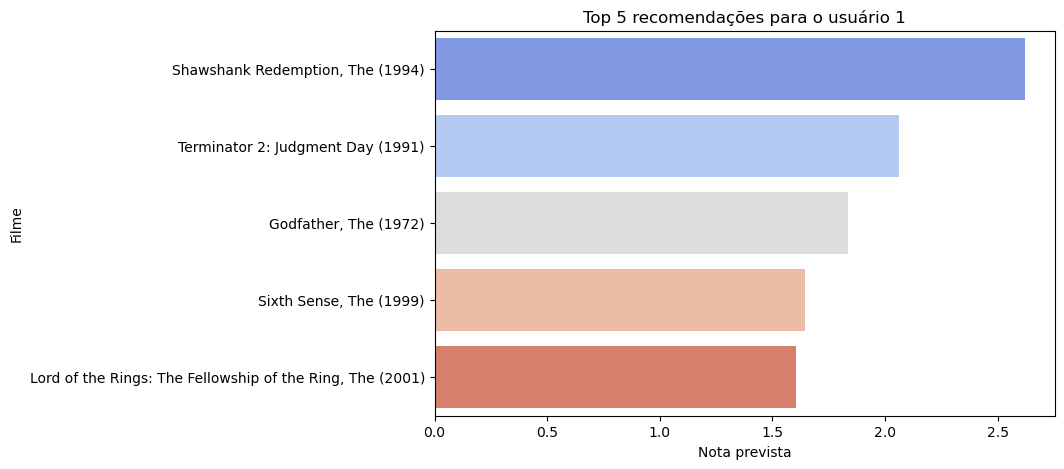

,userId,movieId,title,pred_rating
0,1,318,"Shawshank Redemption, The (1994)",2.622414
1,1,589,Terminator 2: Judgment Day (1991),2.061920
2,1,858,"Godfather, The (1972)",1.836914
3,1,2762,"Sixth Sense, The (1999)",1.643315
4,1,4993,"Lord of the Rings: The Fellowship of the Ring,...",1.605043


In [130]:
# Escolher um usuário para visualização
user_id = 1  # você pode mudar para qualquer userId do dataset

# Filtra recomendações do usuário
user_recs = recommendations_df[recommendations_df['userId'] == user_id].sort_values(by='pred_rating', ascending=False)

# Plota as recomendações
plt.figure(figsize=(8,5))
sns.barplot(x='pred_rating', y='title', data=user_recs, palette='coolwarm')
plt.title(f"Top {len(user_recs)} recomendações para o usuário {user_id}")
plt.xlabel("Nota prevista")
plt.ylabel("Filme")
plt.show()

# Mostra no console
user_recs


